In [256]:
%matplotlib inline
import time
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("drone_delivery_v1.csv", sep=";",header = 0, index_col = None,)
df = pd.DataFrame(data)
df.head(5)

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


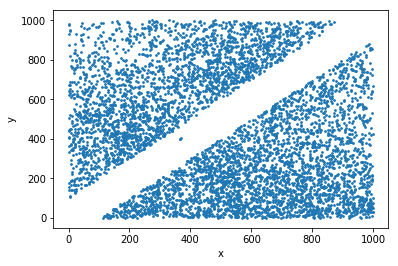

In [257]:
df.plot.scatter(x='x', y='y', s=3);

In [258]:
f1 = data['x'].values
f2 = data['y'].values
X = np.array(list(zip(f1, f2)))
# Number of clusters
n_clusters = 10
start = time.time()
kmeans = KMeans(n_clusters)
kmeans = kmeans.fit(X)
end = time.time()
centroids = kmeans.cluster_centers_

In [259]:
print(centroids)
print(end-start)

[[548.63898325 177.63423172]
 [182.28329213 831.99399023]
 [847.78718888 124.71313623]
 [883.08382057 645.01768205]
 [105.94127972 329.10607052]
 [202.07599617 527.21828358]
 [310.93880845  86.6382827 ]
 [627.56995326 894.18096842]
 [746.74050402 406.7837405 ]
 [448.96508144 731.70755785]]
0.4587364196777344


<h3>Increasing number of depots greatly increases time it takes to calculate centroids</h3>

In [260]:
df2 = df
df2['group'] = kmeans.labels_
df2.head(10)

,clientid,x,y,group
0,1,622.771572,164.857623,0
1,2,416.357298,630.193634,9
2,3,292.735020,567.333231,5
3,4,737.211288,166.225676,2
4,5,540.475375,682.912298,9
5,6,535.469492,318.439661,0
6,7,640.380050,870.833221,7
7,8,235.772075,359.048203,4
8,9,481.896884,661.491838,9
9,10,730.032789,312.177817,8


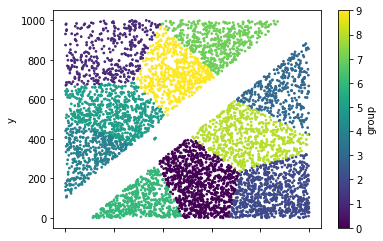

In [261]:
df2.plot.scatter(x='x', y='y', c='group', s=3, colormap='viridis')

[3 0 0 ... 2 7 6]
1.1419856548309326


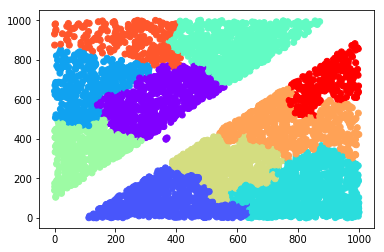

In [262]:
start = time.time()
clustering = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')  
clustering.fit_predict(X)
end = time.time()
print(clustering.labels_)
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')
print(end-start)

<h3>Changing number of depots doesn't change running time that much.</h3>
        Because depots are based through adding up smaller centroids borders between each cluster is much more dynamic than using kmeans approach.